In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def set_dark_theme():
    """
    Activa el estilo oscuro elegante para todos los gráficos.
    """
    
    sns.set_theme(
        style="darkgrid",
        rc={
            "figure.facecolor": "#1B1F30",   # fondo figura
            "axes.facecolor": "#1B1F30",     # fondo ejes
            "axes.edgecolor": "#1B1F30",
            "savefig.facecolor": "#1B1F30",
            "grid.color": "#2B314A",         # grid suave
            "axes.labelcolor": "white",
            "xtick.color": "white",
            "ytick.color": "white",
            "text.color": "white",
            "legend.facecolor": "#1B1F30",
            "legend.edgecolor": "#1B1F30",
        }
    )

COLOR_VERDE = "#32E875"  # verde moderno

# Primera hipotesis

## 📌 Hipótesis Inicial

Al observar las columnas del dataset, planteo que será posible extraer información relevante sobre distintos aspectos musicales.  
En concreto, espero poder identificar:

- El **artista**, **canción** y **álbum más populares**.  
- La canción con:
  - **Mayor tempo**
  - **Mayor energía**
  - **Mayor duración**
  - **Menor duración**
  - **Mayor valence** (más alegre)
  - **Menor valence** (más triste)
- Las **relaciones entre variables numéricas** mediante correlaciones.
- La existencia de **valores atípicos o datos anómalos**.
- El nivel de **limpieza del dataset** original.

Mi hipótesis es que encontraré patrones claros en las métricas musicales y correlaciones significantes entre algunas variables clave como energía, volumen o acústica

# Puesto a punto del Dataset

### Importacion del Dataset

In [2]:
df = pd.read_csv("C:/Users/notth/Curso/2-Data_Analysis/EDA/EDA_DEFI/data/dataset.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Inspeccion rapida

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Primera limpieza 

In [6]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Tratamiento de nulos

In [7]:
df = df.dropna()

### Segunda limpieza

In [8]:
df.duplicated(subset=["track_id"]).sum()

np.int64(24259)

In [9]:
df = df.drop_duplicates(subset=["track_id"],keep="first") 
# subset se encarga de comprobar los duplicados por columnas 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89740 non-null  int64  
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness       89740 non-null  float64
 13  acousticness      89740 non-null  float64
 14  instrumentalness  89740 non-null  float64
 15  liveness          89740 non-null  float64
 16  valence           89740 non-null  float64
 1

# Analisis de canciones al extremo

In [11]:
# 1. Obtener el tempo máximo
max_tempo = df["tempo"].max()

# 2. Filtrar todas las canciones que tengan ese tempo
canciones_max_tempo = df[df["tempo"] == max_tempo]

canciones_max_tempo[["track_name", "artists", "album_name", "tempo", "track_genre"]]

,track_name,artists,album_name,tempo,track_genre
8619,Call The Doctor,J.J. Cale,Naturally,243.372,blues


In [12]:
# 1. Obtener la energia maxima
max_energy = df["energy"].max()

# 2. Filtrar las canciones que tengan esa energia
canciones_max_energy = df[df["energy"] == max_energy]
canciones_max_energy[["track_name", "artists", "album_name", "popularity", "energy", "track_genre"]].head()

,track_name,artists,album_name,popularity,energy,track_genre
6059,Affront Final,Akitsa,Goétie,23,1.0,black-metal
6088,Transilvanian Hunger - Studio,Darkthrone,Transilvanian Hunger,48,1.0,black-metal
22947,Do Lacre ao Lucro,Surra,Escorrendo Pelo Ralo,22,1.0,death-metal
25937,Da sprach der alte Häuptling der Indianer,Willi Herren,Lobet den Herren,30,1.0,disco
46578,Bass Be Louder - Edit,Scott Brown,Pussy lounge 2015,19,1.0,happy


In [13]:
# Duración máxima
max_duration = df["duration_ms"].max()
canciones_max_duration = df[df["duration_ms"] == max_duration][
    ["track_name", "artists", "album_name", "duration_ms", "track_genre"]
]

# Duración mínima
min_duration = df["duration_ms"].min()
canciones_min_duration = df[df["duration_ms"] == min_duration][
    ["track_name", "artists", "album_name", "duration_ms", "track_genre"]
]

In [14]:
canciones_max_duration

,track_name,artists,album_name,duration_ms,track_genre
73617,Unity (Voyage Mix) Pt. 1,Tale Of Us,Unity (Voyage Mix),5237295,minimal-techno


In [15]:
canciones_min_duration

,track_name,artists,album_name,duration_ms,track_genre
59310,The Exorsism Begins...,Leila Bela,Angra Manyu,8586,iranian


In [16]:
# Mas alegre

max_valence = df["valence"].max()

cancion_max_valence = df[df["valence"] == max_valence]
cancion_max_valence[["track_name", "artists", "album_name", "valence", "track_genre"]]

,track_name,artists,album_name,valence,track_genre
1813,The Demander,Victor Rice,Drink,0.995,afrobeat


In [17]:
# Mas triste

min_valence = df["valence"].min()

cancion_min_valence = df[df["valence"] == min_valence]
cancion_min_valence[["track_name", "artists", "album_name", "valence", "track_genre"]]

,track_name,artists,album_name,valence,track_genre
4131,The Departure,Max Richter;Lang Lang,Voyager - Essential Max Richter,0.0,ambient
4379,The End of Childhood (feat. Jack Liebeck),Dario Marianelli;Jack Liebeck;Benjamin Wallfisch,Jane Eyre - Original Motion Picture Soundtrack,0.0,ambient
4664,Ferme Les Yeux,Sylvain Chauveau,Des Plumes Dans La Tête,0.0,ambient
16856,"Andante in C Major, K. 1a",Wolfgang Amadeus Mozart;Ingrid Haebler,Mozart: The Complete Piano Sonatas,0.0,classical
26813,Alouette Pt.2,Kindy Corner,Sleeping Songs for New Babies,0.0,disney
...,...,...,...,...,...
101988,Tin White Noise,Granular,The World Of,0.0,sleep
101993,Rain: Natural Recording,Rain Sounds,Rain,0.0,sleep
113428,Aire de verano,El Ruido Blanco;Soñoliento Juan;Mantra para Do...,Aire Acondicionado de Ruido Blanco,0.0,world-music
113688,Ruido Rosa Puro - Una Hora Versión,El Ruido Blanco,Ruido Blanco para el bebé: sonidos relajantes ...,0.0,world-music


In [18]:
top5_populares = (
    df[["track_name", "artists", "album_name", "popularity", "track_genre", "danceability", "energy", "acousticness", "valence", "tempo"]]
    .sort_values(by="popularity", ascending=False)
    .head(5)
)

top5_populares

,track_name,artists,album_name,popularity,track_genre,danceability,energy,acousticness,valence,tempo
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100,dance,0.714,0.472,0.01300,0.238,131.121
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",99,hip-hop,0.621,0.782,0.01250,0.550,128.033
20008,I'm Good (Blue),David Guetta;Bebe Rexha,I'm Good (Blue),98,dance,0.561,0.965,0.00383,0.304,128.040
67356,La Bachata,Manuel Turizo,La Bachata,98,latin,0.835,0.679,0.58300,0.850,124.980
67358,Me Porto Bonito,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,97,latin,0.911,0.712,0.09010,0.425,92.005


# Analisis por genero

In [19]:
top_energy = (
    df.groupby("track_genre")["energy"]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)

top_energy

track_genre
death-metal    0.932165
grindcore      0.926018
happy          0.910693
metalcore      0.902281
hardstyle      0.899488
Name: energy, dtype: float64

In [20]:
top_tempo = (
    df.groupby("track_genre")["tempo"]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)
top_tempo

track_genre
drum-and-bass    155.151446
happy            152.956724
hardstyle        146.688615
forro            140.350656
j-idol           136.081969
Name: tempo, dtype: float64

In [21]:
top_popular = (
    df.groupby("track_genre")["popularity"]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)
top_popular


track_genre
k-pop       59.423581
pop-film    59.096933
metal       56.422414
chill       53.738683
latino      51.788945
Name: popularity, dtype: float64

# Analisis univariante

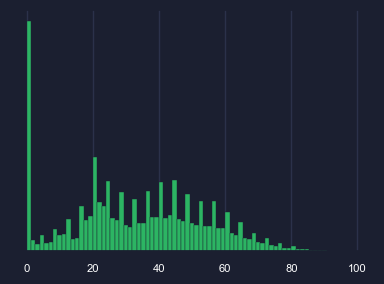

In [24]:
set_dark_theme()  # activar estética

plt.figure(figsize=(4, 3))

sns.histplot(
    df["popularity"],
    kde=False,
    color=COLOR_VERDE,
    edgecolor="#1B1F30",
    linewidth=0.3
)

plt.title("")         # sin título
plt.ylabel("")        # sin eje Y
plt.xlabel("", color="white")

plt.xticks(fontsize=8)
plt.yticks([], [])    # elimina eje Y por completo

plt.tight_layout()
plt.show()

Distribución de Popularity
La mayoría de las canciones tienen puntuaciones de popularidad muy bajas.
Se observa una fuerte concentración en valores entre 0 y 20, mientras que las canciones muy populares son escasas.
Esto indica que el dataset está dominado por canciones poco escuchadas o de nicho.

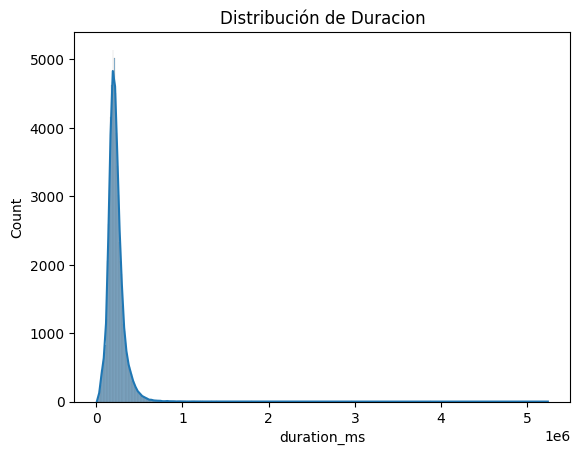

In [ ]:
sns.histplot(df["duration_ms"], kde=True)
plt.title("Distribución de Duracion")
plt.show()

La mayoría de canciones duran entre 150 y 300 segundos (2,5–5 minutos).
La distribución está muy concentrada a la izquierda y tiene una cola larga hacia duraciones altas.

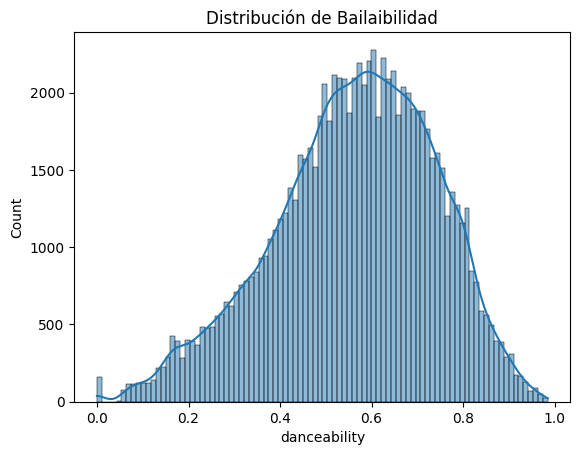

In [ ]:
sns.histplot(df["danceability"], kde=True)
plt.title("Distribución de Bailaibilidad")
plt.show()

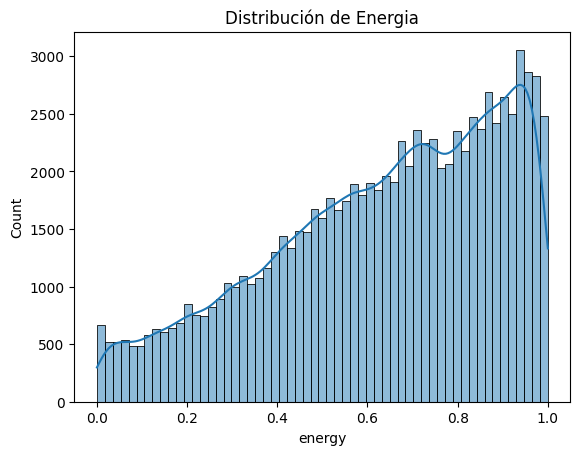

In [ ]:
sns.histplot(df["energy"], kde=True)
plt.title("Distribución de Energia")
plt.show()

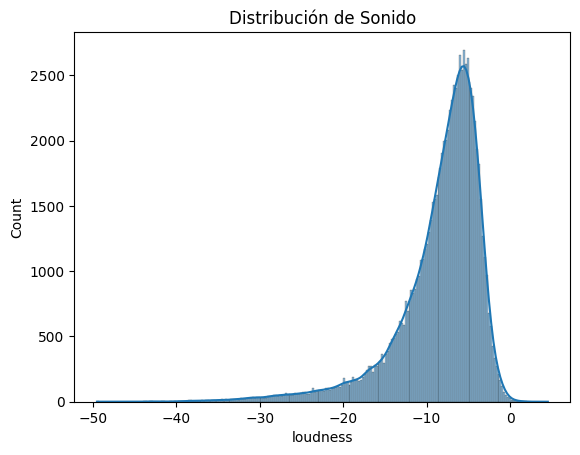

In [ ]:
sns.histplot(df["loudness"], kde=True)
plt.title("Distribución de Sonido")
plt.show()

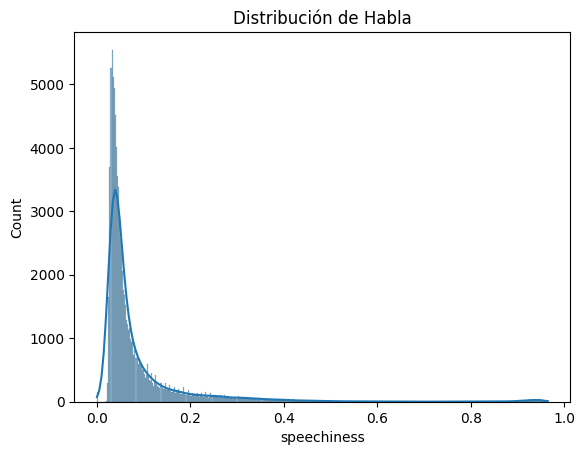

In [ ]:
sns.histplot(df["speechiness"], kde=True)
plt.title("Distribución de Habla")
plt.show()

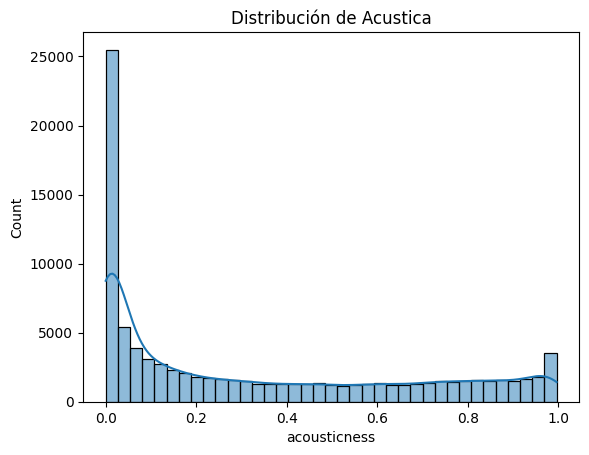

In [ ]:
sns.histplot(df["acousticness"], kde=True)
plt.title("Distribución de Acustica")
plt.show()

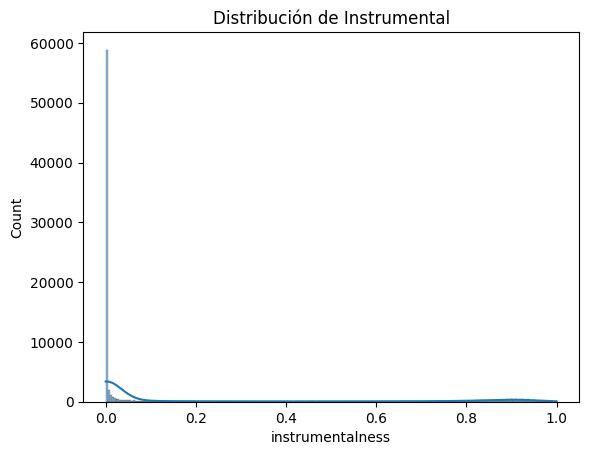

In [ ]:
sns.histplot(df["instrumentalness"], kde=True)
plt.title("Distribución de Instrumental")
plt.show()

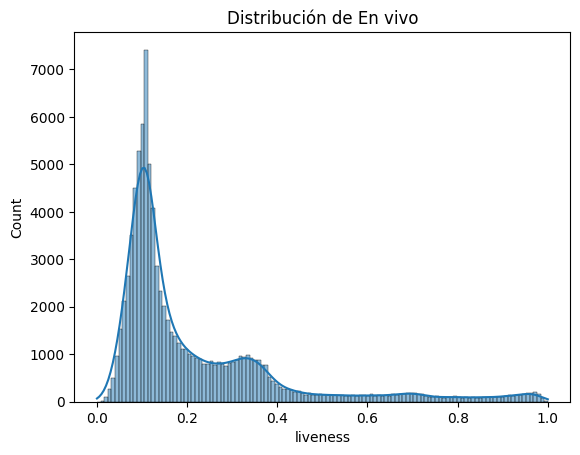

In [ ]:
sns.histplot(df["liveness"], kde=True)
plt.title("Distribución de En vivo")
plt.show()

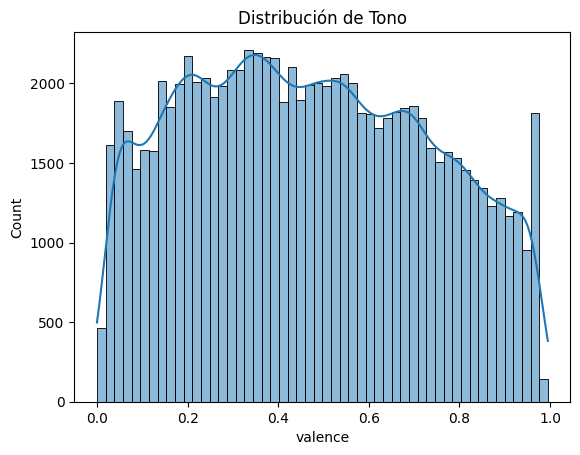

In [ ]:
sns.histplot(df["valence"], kde=True)
plt.title("Distribución de Tono")
plt.show()

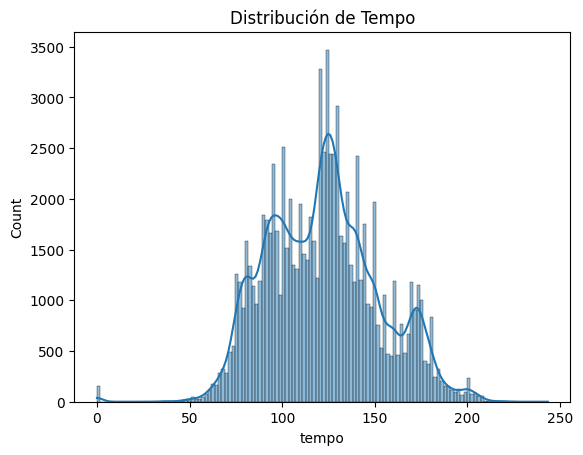

In [ ]:
sns.histplot(df["tempo"], kde=True)
plt.title("Distribución de Tempo")
plt.show()

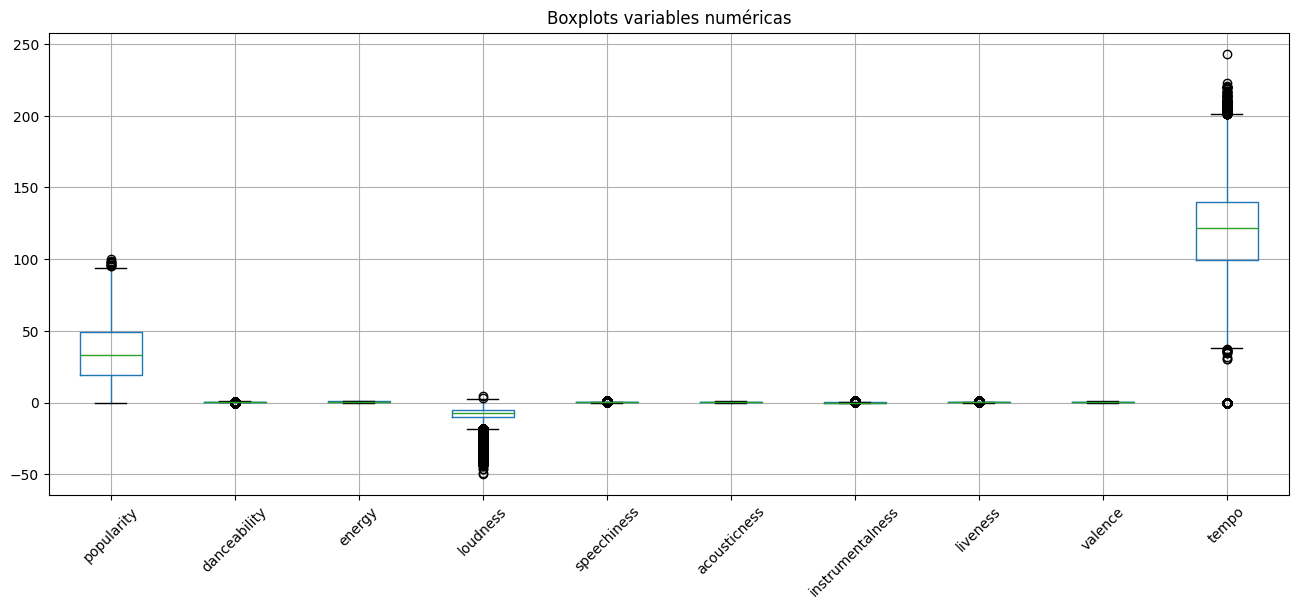

In [ ]:
num_cols = ["popularity", "danceability", "energy", "loudness",
            "speechiness", "acousticness", "instrumentalness", "liveness",
            "valence", "tempo"]

df[num_cols].boxplot(figsize=(16,6))
plt.xticks(rotation=45)
plt.title("Boxplots variables numéricas")
plt.show()

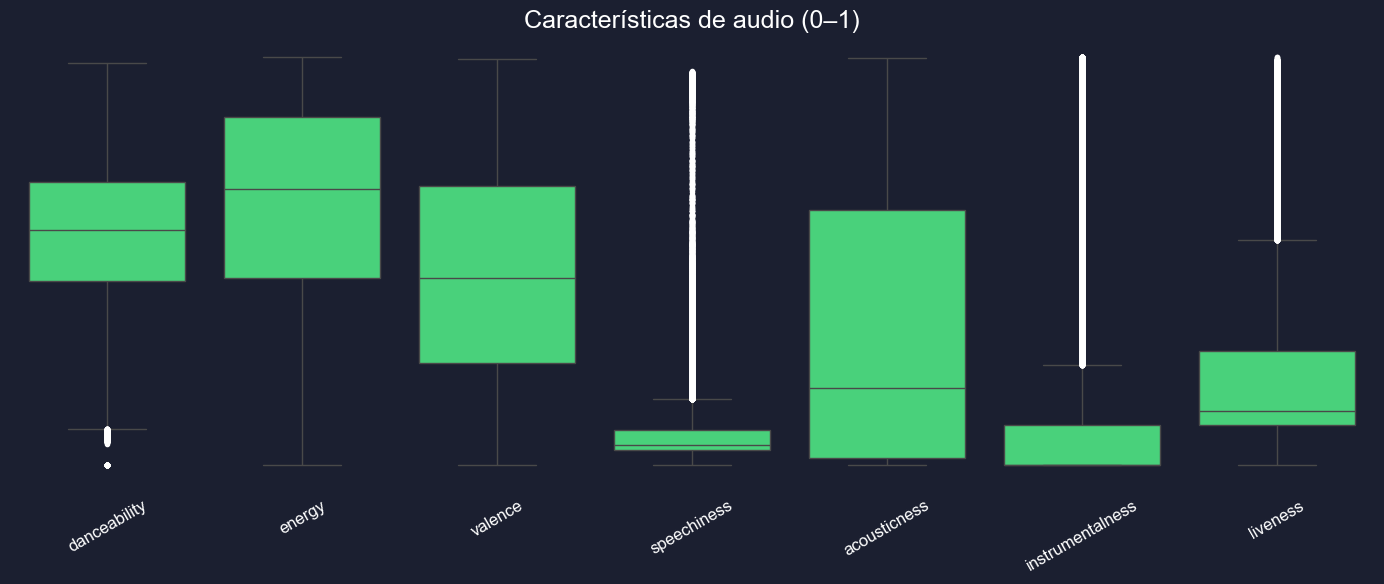

In [ ]:
set_dark_theme()
COLOR_VERDE = "#32E875"

variables_01 = [
    "danceability", "energy", "valence",
    "speechiness", "acousticness",
    "instrumentalness", "liveness"
]

plt.figure(figsize=(14, 6))

sns.boxplot(
    data=df[variables_01],
    color=COLOR_VERDE,
    fliersize=3,
    flierprops={
        'marker':'o',
        'markerfacecolor':'white',
        'markeredgecolor':'white',
        'markersize':3
    }
)

plt.title("Características de audio (0–1)", fontsize=18, color="white")
plt.xticks(rotation=30, color="white", fontsize=12)

plt.yticks([])   # ← elimina números y marcas del eje Y

plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

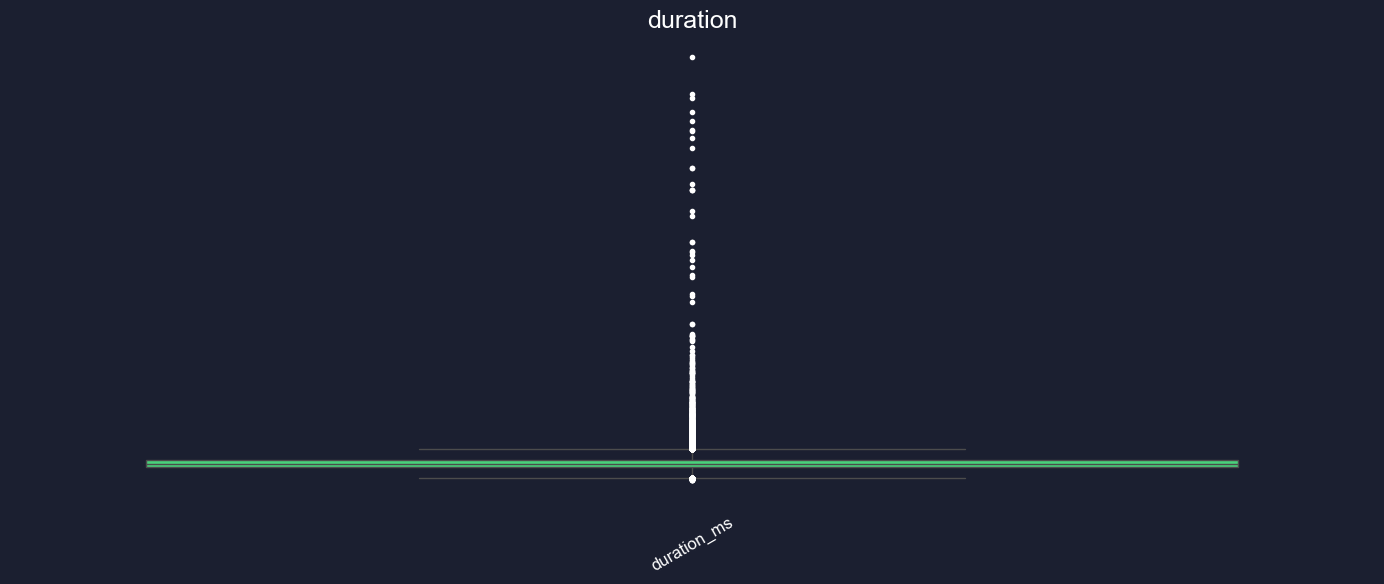

In [ ]:
set_dark_theme()
COLOR_VERDE = "#32E875"

variables_01 = [
    "duration_ms"
]

plt.figure(figsize=(14, 6))

sns.boxplot(
    data=df[variables_01],
    color=COLOR_VERDE,
    fliersize=3,
    flierprops={
        'marker':'o',
        'markerfacecolor':'white',
        'markeredgecolor':'white',
        'markersize':3
    }
)

plt.title("duration", fontsize=18, color="white")
plt.xticks(rotation=30, color="white", fontsize=12)

plt.yticks([])   # ← elimina números y marcas del eje Y

plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

<Axes: xlabel='mode', ylabel='count'>

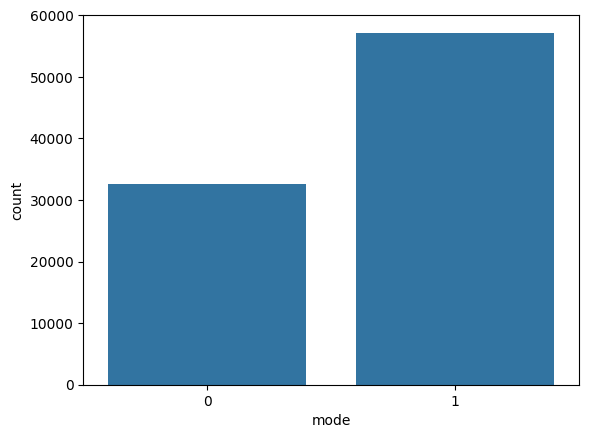

In [ ]:
sns.countplot(df, x="mode")

<Axes: xlabel='key', ylabel='count'>

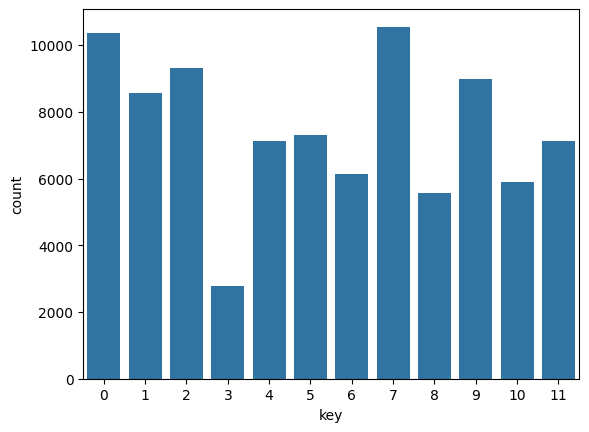

In [ ]:
sns.countplot(df, x="key")

<Axes: xlabel='explicit', ylabel='count'>

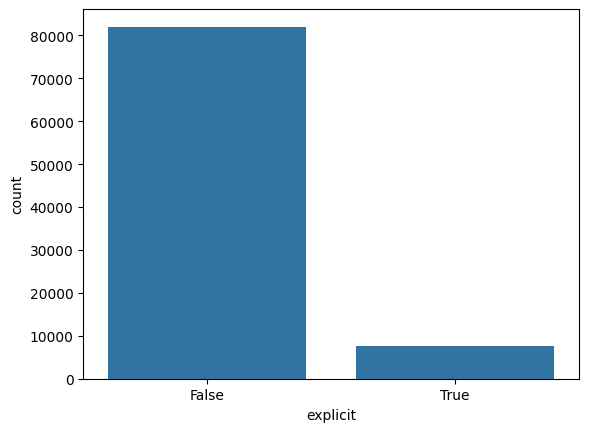

In [ ]:
sns.countplot(df, x="explicit")

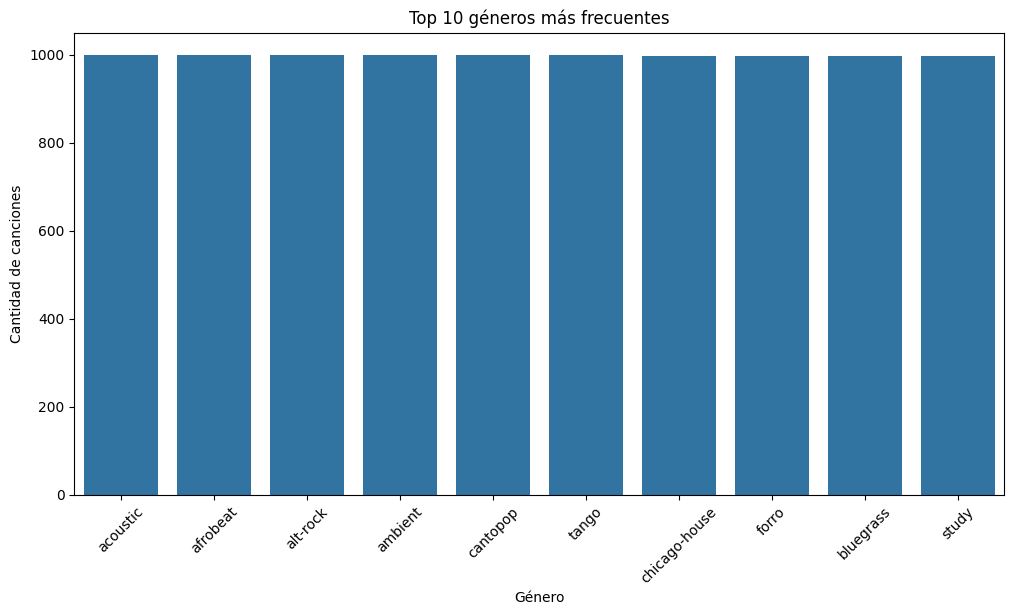

In [ ]:
plt.figure(figsize=(12,6))

top_genres = df['track_genre'].value_counts().head(10)

sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title("Top 10 géneros más frecuentes")
plt.xlabel("Género")
plt.ylabel("Cantidad de canciones")
plt.xticks(rotation=45)
plt.show()

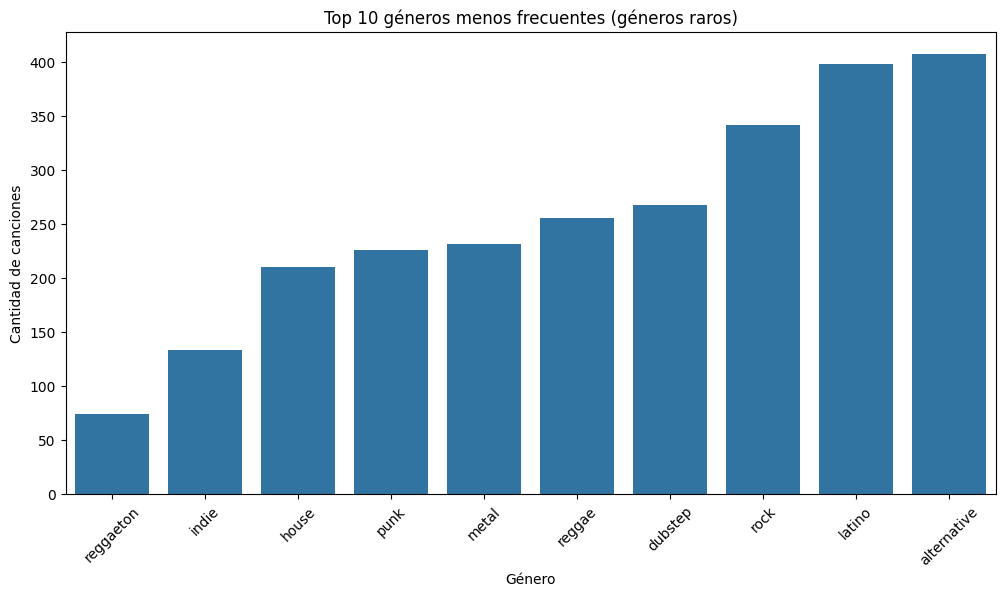

In [ ]:
plt.figure(figsize=(12,6))

# Obtener los 10 géneros menos frecuentes
rarezas = df["track_genre"].value_counts().nsmallest(10)

sns.barplot(x=rarezas.index, y=rarezas.values)
plt.title("Top 10 géneros menos frecuentes (géneros raros)")
plt.xlabel("Género")
plt.ylabel("Cantidad de canciones")
plt.xticks(rotation=45)
plt.show()

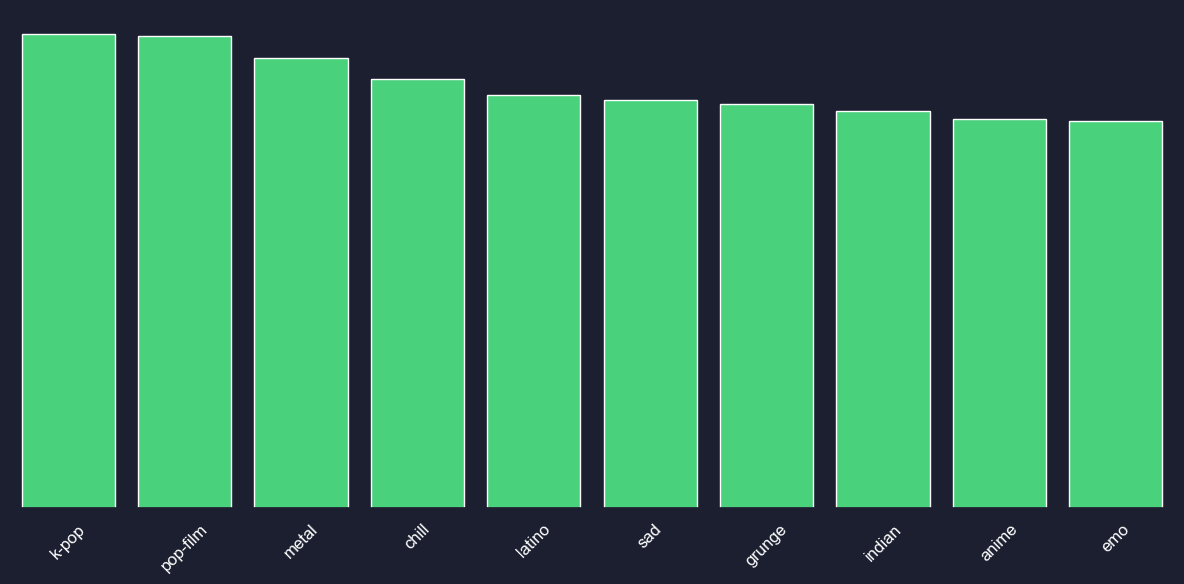

In [ ]:
set_dark_theme()
COLOR_VERDE = "#32E875"

generos_populares = (
    df.groupby("track_genre")["popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))

sns.barplot(
    x=generos_populares.index,
    y=generos_populares.values,
    color=COLOR_VERDE
)

plt.title("", fontsize=18, color="white")

# Rotación de etiquetas de abajo
plt.xticks(rotation=45, color="white", fontsize=12)

# QUITAR números del eje Y
plt.yticks([])

# QUITAR etiqueta del eje X
plt.xlabel("")

plt.tight_layout()
plt.show()

artists → Artistas

album_name → Nombre del álbum

track_name → Título de la canción

popularity → Popularidad

duration_ms → Duración en milisegundos

explicit → Contenido explícito (sí/no)

danceability → Bailabilidad

energy → Energía

key → Tono musical

loudness → Volumen (dB)

mode → Modo (mayor / menor)

speechiness → Cantidad de voz hablada

acousticness → Acústica

instrumentalness → Nivel instrumental

liveness → Intensidad de sonido en vivo

valence → Positividad / alegría

tempo → Tempo (BPM)

time_signature → Compás

track_genre → Género musical

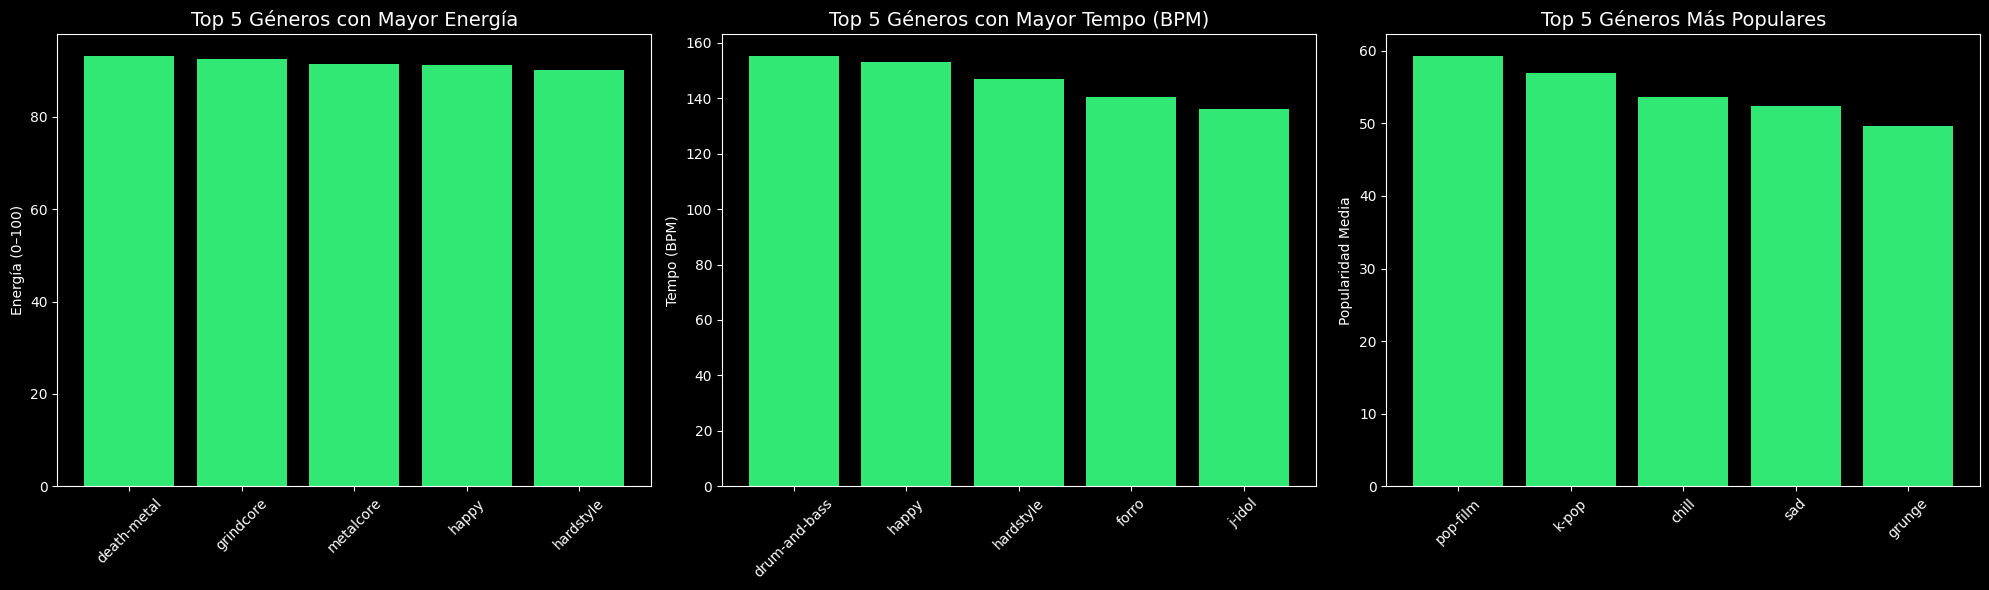

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
#   TUS TOP 5 REALES
# =========================

top_energy = {
    "death-metal": 0.931470,
    "grindcore": 0.924201,
    "metalcore": 0.914485,
    "happy": 0.910971,
    "hardstyle": 0.901246
}

top_tempo = {
    "drum-and-bass": 155.241712,
    "happy": 152.908962,
    "hardstyle": 146.837452,
    "forro": 140.362197,
    "j-idol": 136.112004
}

top_popular = {
    "pop-film": 59.283,
    "k-pop": 56.896,
    "chill": 53.651,
    "sad": 52.379,
    "grunge": 49.594
}

# =========================
#      GRAFICAZO
# =========================

plt.style.use("dark_background")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

COLOR = "#32E875"

# --- Energía (0–1 → 0–100)
genres = list(top_energy.keys())
values = [v * 100 for v in top_energy.values()]

axes[0].bar(genres, values, color=COLOR)
axes[0].set_title("Top 5 Géneros con Mayor Energía", fontsize=14)
axes[0].set_ylabel("Energía (0–100)")
axes[0].tick_params(axis='x', rotation=45)

# --- Tempo
genres = list(top_tempo.keys())
values = list(top_tempo.values())

axes[1].bar(genres, values, color=COLOR)
axes[1].set_title("Top 5 Géneros con Mayor Tempo (BPM)", fontsize=14)
axes[1].set_ylabel("Tempo (BPM)")
axes[1].tick_params(axis='x', rotation=45)

# --- Popularidad
genres = list(top_popular.keys())
values = list(top_popular.values())

axes[2].bar(genres, values, color=COLOR)
axes[2].set_title("Top 5 Géneros Más Populares", fontsize=14)
axes[2].set_ylabel("Popularidad Media")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Correlaciones y multivariantes

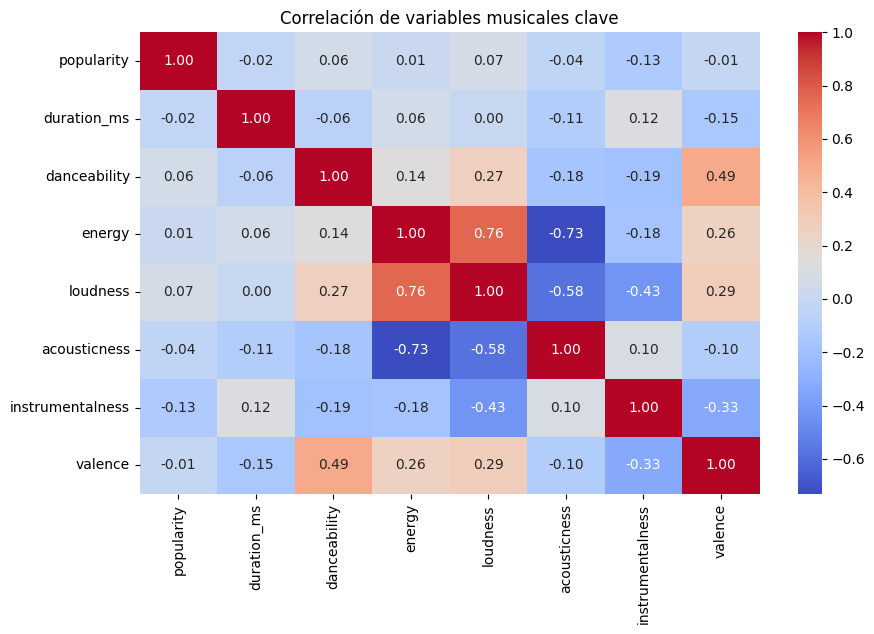

In [ ]:
cols = ["popularity", "duration_ms", "danceability", "energy", 
        "loudness", "acousticness", "instrumentalness", "valence"]

plt.figure(figsize=(10, 6))
sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación de variables musicales clave")
plt.show()

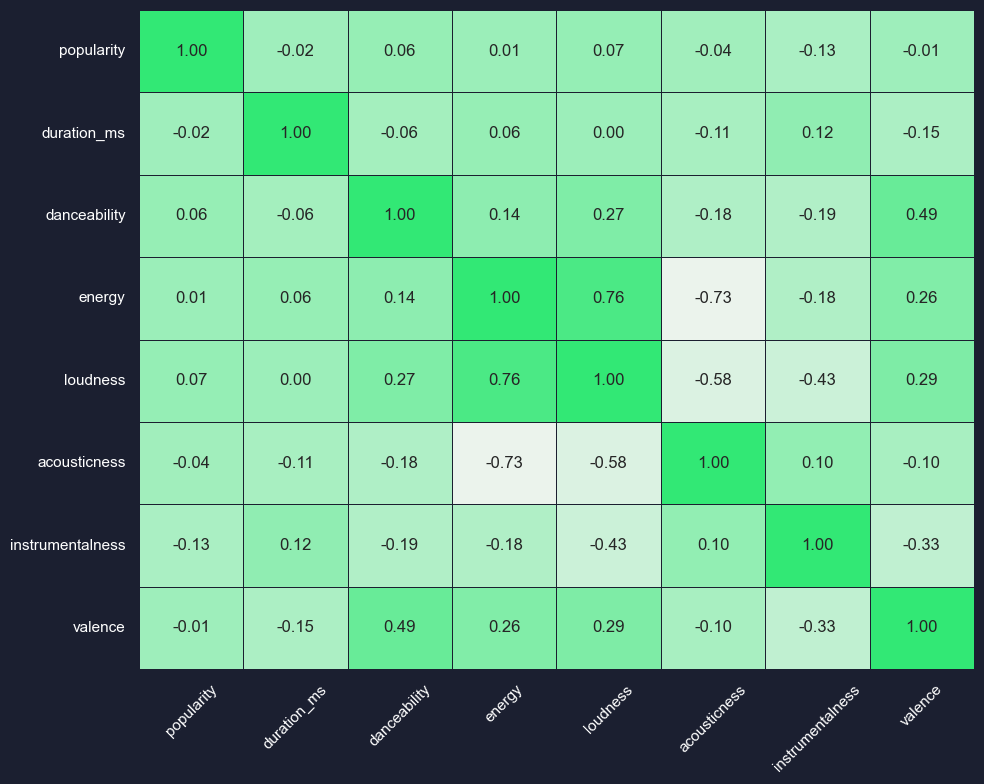

In [ ]:
set_dark_theme()
COLOR_VERDE = "#32E875"

# Variables musicales clave
vars_corr = [
    "popularity", "duration_ms", "danceability", "energy",
    "loudness", "acousticness", "instrumentalness", "valence"
]

corr = df[vars_corr].corr()

plt.figure(figsize=(10,8))

sns.heatmap(
    corr,
    annot=True,               # ✓ números dentro
    fmt=".2f",                # ✓ 2 decimales
    cmap=sns.light_palette(COLOR_VERDE, as_cmap=True),  # ✓ verde elegante
    cbar=False,               # ✓ sin barra lateral
    linewidths=0.4,
    linecolor="#1B1F30"
)

plt.xticks(rotation=45, color="white")
plt.yticks(rotation=0, color="white")
plt.title("", color="white", fontsize=18)

plt.tight_layout()
plt.show()

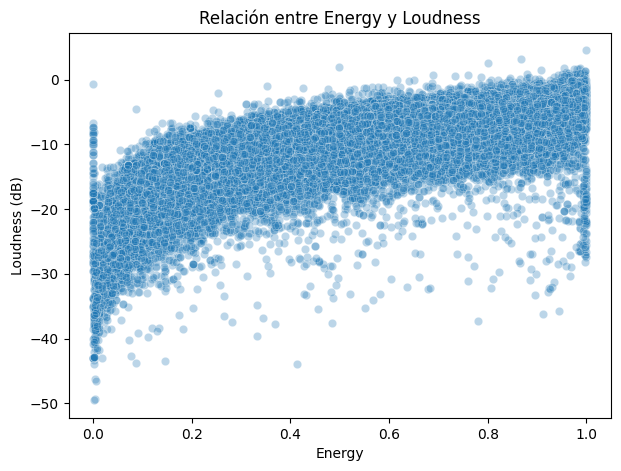

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="energy", y="loudness", alpha=0.3)
plt.title("Relación entre Energy y Loudness")
plt.xlabel("Energy")
plt.ylabel("Loudness (dB)")
plt.show()

Se observa una relación positiva fuerte: las canciones más energéticas también son más ruidosas (loudness más alto). Esto tiene sentido, ya que la música con mucha intensidad (rock, electrónica, pop dinámico) suele tener una producción sonora más potente.

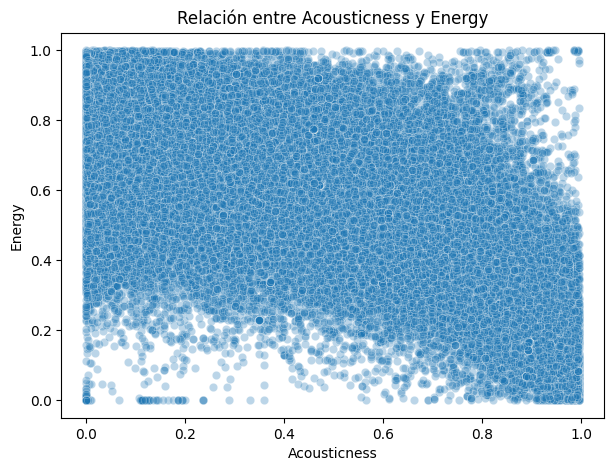

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="acousticness", y="energy", alpha=0.3)
plt.title("Relación entre Acousticness y Energy")
plt.xlabel("Acousticness")
plt.ylabel("Energy")
plt.show()

Existe una correlación negativa notable: las canciones con mucha acousticness suelen tener poca energy. Esto refleja que los temas acústicos tienden a ser tranquilos, mientras que la música más energética suele ser electrónica, pop o con instrumentación potente.

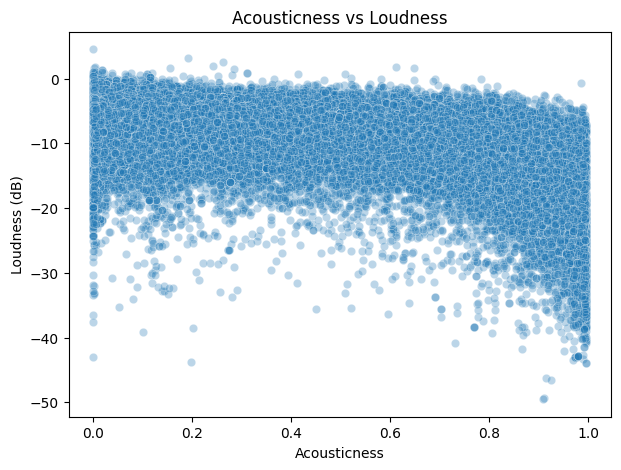

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="acousticness", y="loudness", alpha=0.3)
plt.title("Acousticness vs Loudness")
plt.xlabel("Acousticness")
plt.ylabel("Loudness (dB)")
plt.show()

Se aprecia una relación claramente negativa: cuanto mayor es la acousticness, menor es la loudness. Las canciones acústicas suelen ser más suaves y menos ruidosas, mientras que los temas intensos o electrónicos presentan valores muy bajos de acousticness pero una sonoridad mucho mayor.

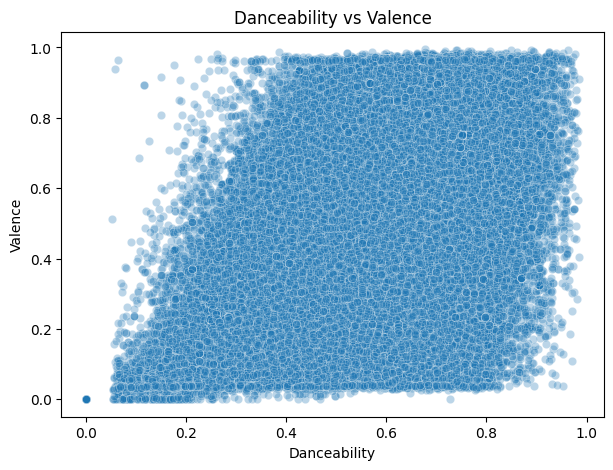

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="danceability", y="valence", alpha=0.3)
plt.title("Danceability vs Valence")
plt.xlabel("Danceability")
plt.ylabel("Valence")
plt.show()

Se observa una correlación positiva moderada: a mayor danceability, tiende a haber mayor valence. Es decir, las canciones más bailables suelen ser más “felices” o con mayor positividad emocional. Aun así, la dispersión es amplia, por lo que la relación no es estricta.

# Conclusion

## 📌 Conclusiones del Análisis

Tras realizar el análisis exploratorio del dataset, puedo extraer varias conclusiones relevantes:

### ✔️ Limpieza de datos
El dataset venía en general bastante limpio.  
Solo fue necesario eliminar duplicados y revisar algunos outliers, especialmente en la variable **duración**, donde se detectaron canciones extremadamente largas (probablemente podcasts o sesiones musicales). El resto de variables numéricas mostraron pocos valores anómalos y nada exagerado.

### ✔️ Comportamiento de las variables numéricas
Los histogramas y boxplots muestran que la mayoría de variables siguen distribuciones razonables y con pocos valores extremos. Únicamente la duración presenta una dispersión anómala debido a los registros muy largos.

### ✔️ Correlaciones más importantes
De todas las correlaciones analizadas, destacan cuatro especialmente significativas:

- **Energy ↔ Loudness** → correlación **positiva del 0.76**  
  > A mayor energía, mayor volumen percibido en la canción.

- **Acousticness ↔ Energy** → correlación **negativa del -0.73**  
  > Las canciones acústicas tienden a ser menos energéticas.

- **Acousticness ↔ Loudness** → correlación **negativa del -0.58**  
  > Las canciones más acústicas suelen ser más suaves en volumen.

- **Danceability ↔ Valence** → correlación **positiva moderada del 0.49**  
  > Las canciones más bailables tienden también a ser más alegres.

Estas relaciones confirman la presencia de patrones bien definidos entre características musicales.

### ✔️ Cumplimiento de la hipótesis
Puedo concluir que todas mis expectativas iniciales se han cumplido:

- Identifiqué los elementos más populares (artista, canción, álbum).  
- Encontré las canciones extremas en duración, energía, tempo y valence.  
- El dataset estaba razonablemente limpio con pocas anomalías.  
- Se detectaron correlaciones claras entre ciertas variables musicales.  
- La exploración del dataset ha sido suficiente para obtener una visión sólida del comportamiento de las canciones.

En resumen, el análisis ha permitido validar completamente la hipótesis inicial y obtener una comprensión detallada de la estructura y relaciones del dataset musical.

---